# Building Trees using scikit-learn

## Introduction

In this lesson, we shall cover decision trees (for classification) in python, using scikit-learn and pandas. The emphasis will be on the basics and understanding the resulting decision tree. Scikit-Learn provides a consisitent interface for running different classifiers/regressors. For classification tasks, evaluation is performed using the same measures as we have seen before. Let's look at our example from earlier lessons and grow a tree to find our solution. 

## Objectives
You will be able to:

- Using `pandas` to prepare the data for the scikit-learn decision tree algorithm
- Train the classifier with a training dataset and evaluate performance using different measures
- Visualize the decision tree and interpret the visualization

## Import Necessary Libraries

In order to prepare data, train, evaluate and visualize a decision tree , we would need a number of packages in python. Here are the packages that you would normally consider importing before moving on.

```python
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd 
import numpy as np 
```

In [1]:
!conda install graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.7
  latest version: 4.6.8

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda/envs/learn-env

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    cairo-1.14.12              |       h8948797_3         1.3 MB  defaults
    certifi-2019.3.9           |           py36_0         149 KB  conda-forge
    gettext-0.19.8.1           |    hc5be6a0_1002         3.6 MB  conda-forge
    graphite2-1.3.13           |    hf484d3e_1000         109 KB  conda-forge
    graphviz-2.38.0            |    hcf1ce16_1009         9.7 MB  conda-forge
    harfbuzz-1.9.0             |    he243708_1001         957 KB  conda-forge
    

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd 
import numpy as np

## Create Dataframe

The play tennis dataset is available in the repo as `tennis.csv`.
- Import the csv file as a pandas dataframe
- Apply labels to target variable such that `yes=1` and `no=0`
- Apply one hot encoding to the feature set, creating ten features (outlook x 3, temp x 3, humidity x 2 , wind x 2) 
- Print the resulting features and check shape

```python
# Load the dataset
df = pd.read_csv('tennis.csv') 

# Create label encoder instance
lb = LabelEncoder() 

# Create Numerical labels for classes
df['play_'] = lb.fit_transform(df['play'] ) 
df['outlook_'] = lb.fit_transform(df['outlook']) 
df['temp_'] = lb.fit_transform(df['temp'] ) 
df['humidity_'] = lb.fit_transform(df['humidity'] ) 
df['windy_'] = lb.fit_transform(df['windy'] ) 

# Split features and target variable
X = df[['outlook_', 'temp_', 'humidity_', 'windy_']] 
Y = df['play_']

# Instantiate a one hot encoder
enc = preprocessing.OneHotEncoder()

# Fit the feature set X
enc.fit(X)

# Transform X to onehot array 
onehotX = enc.transform(X).toarray()

onehotX, onehotX.shape, X.shape
```

In [3]:
df = pd.read_csv('tennis.csv')

In [4]:
lb = LabelEncoder()

In [5]:
df['play_'] = lb.fit_transform(df['play'] ) 
df['outlook_'] = lb.fit_transform(df['outlook']) 
df['temp_'] = lb.fit_transform(df['temp'] ) 
df['humidity_'] = lb.fit_transform(df['humidity'] ) 
df['windy_'] = lb.fit_transform(df['windy'] ) 

In [6]:
X = df[['outlook_', 'temp_', 'humidity_', 'windy_']] 
Y = df['play_']

In [7]:
enc = OneHotEncoder()

In [8]:
enc.fit(X)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [9]:
onehotX = enc.transform(X).toarray()

In [10]:
onehotX, onehotX.shape, X.shape

(array([[0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
        [0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
        [1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 0., 0., 1., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
        [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
        [1., 0., 0., 1., 0., 0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
        [0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
        [0., 1., 0., 0., 0., 1., 0., 1., 1., 0.],
        [0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
        [1., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
        [1., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
        [0., 1., 0., 0., 0., 1., 1., 0., 0., 1.]]), (14, 10), (14, 4))

## Create Test and Training sets

So now we have our data one hot encoded , and ready for training. We shall pass `onehotX` and `Y` to the split function to create a 70/30 train test split. 

```python
# Create a 70/30 split
X_train, X_test , y_train,y_test = train_test_split(onehotX, Y, test_size = 0.3, random_state = 100) 
```

In [11]:
X_train, X_test, y_train, y_test = train_test_split(onehotX, Y, test_size=.3, random_state = 100)

## Train the Decision Tree 

Scikit learn offers uniform interface for training classifier. We first create an instance of the classifier with any parameter values, fit our data to the model using `.fit()` and make predictions with `X_test` using `.predict()`. 

```python
# Train the classifier and make predictions
clf= DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)
```

In [12]:
clf= DecisionTreeClassifier(criterion='entropy')

In [13]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
y_pred = clf.predict(X_test)

In [15]:
y_pred

array([0, 1, 1, 0, 1])

In [16]:
y_test

11    1
12    1
5     0
1     0
9     1
Name: play_, dtype: int64

## Evaluate the Predictive Performance

So now we can go on and see how accurate our predictions are. We can use a simple accuracy measure , AUC , Confusion matrix, or all of them. This step is performed in the exactly the same manner , doesnt matter which  classifier you are dealing with. 

```python
# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


```

In [17]:
acc = accuracy_score(y_test, y_pred) * 100

In [18]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

In [19]:
roc_auc = auc(false_positive_rate, true_positive_rate)

In [20]:
print('Accuracy is: {0}'.format(acc))
print('\nAUC is: {0}'.format(round(roc_auc, 2)))
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Accuracy is: 60.0

AUC is: 0.58

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,1,1,2
1,1,2,3
All,2,3,5


This looks a bit weird. We saw a perfect split and cleaned up all the data in our example earlier, so we should be able to see a 100% accuracy. Any ideas ?? Well here, we have split the data , and 30% of the data is not shown to the classifier. This takes away a lot of information from this tiny dataset and hence we can not hit 100% accuracy any more. 

We can experiment with training on complete dataset , and then making predictions on test set (which will be pointless as test set is a part of complete data, so that means our classifier has already learned that information). Nevertheless, here it is , just to prove a point really. 

```python
# train another classifier with complete dataset
clf2= DecisionTreeClassifier(criterion='entropy')

clf2.fit(onehotX,Y) # passing in data pre-split
y_pred = clf2.predict(X_test)

# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC is :{0}".format(roc_auc))

print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


```

In [21]:
# train another classifier with complete dataset
clf2= DecisionTreeClassifier(criterion='entropy')

clf2.fit(onehotX,Y) # passing in data pre-split
y_pred = clf2.predict(X_test)

# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC is :{0}".format(roc_auc))

print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :100.0
AUC is :1.0

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,2,0,2
1,0,3,3
All,2,3,5


There you have it, a perfect classification. Well it's actually over-fitting and such results are never possible in real world scenarios. 

## Visualize the Decision Tree

So now we can visualize our decision tree. We use the `graph_viz` library to get the visual output. Do install graphviz if you haven't done so already. 

```python
# Visualize the decision tree using graph viz library 
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
```

In [22]:
dot_data = StringIO()

In [23]:
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)

In [24]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

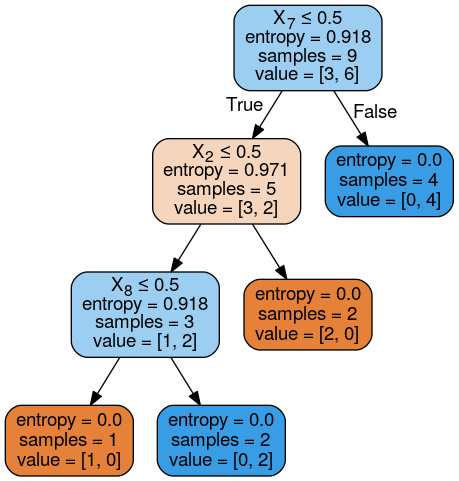

In [25]:
Image(graph.create_png())

Remember this tree looks different from the tree we manually created earlier , as we are using a different set of derived features to train this tree. The information content of one hot encoded data remains exactly the same as raw data. We can also visualize the tree we created with complete dataset  as shown below. You will see that extra information in complete dataset allows tree to grow new branches and nodes and thus getting a 100% accuracy.
```python
# Visualize the tree trained from complete dataset
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
```

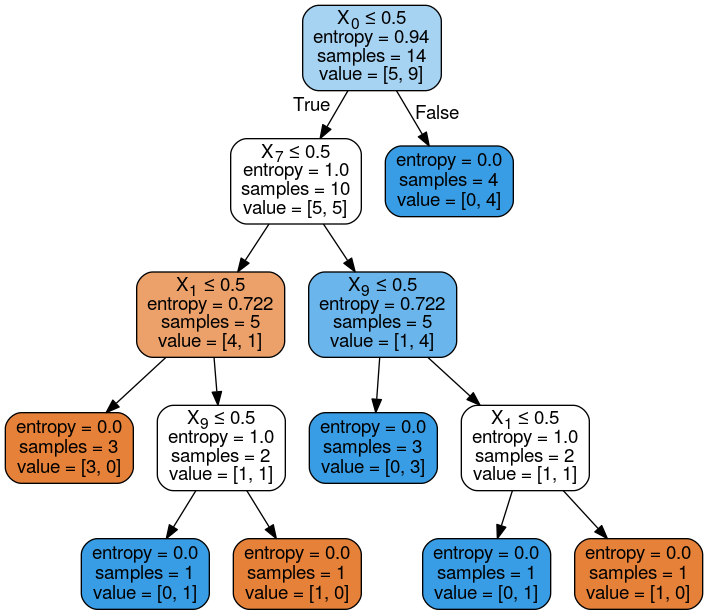

In [26]:
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [27]:
# Code here 

## Summary 

In this lesson, we looked at how to grow a decision tree in scikitlearn and python. We looked at different stages of data processing, training and evaluation that you would normally come across while growing a tree or training any other such classifier. We shall now move to a lab, where you will be required to build a tree for a given problem, following the steps shown in this lesson. 